# Importing  Required Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
import numpy as np 


In [3]:
df = pd.read_csv('IMDB movies.csv', encoding='iso-8859-1')


In [4]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [6]:
df.shape

(15509, 10)

In [7]:
df.info


<bound method DataFrame.info of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Votes

In [8]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.duplicated().sum()

6

In [11]:
df.shape

(15509, 10)

# Data Processing

In [12]:
# Fill missing values in categorical columns with 'Unknown'
df['Genre'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Actor 1'].fillna('Unknown', inplace=True)
df['Actor 2'].fillna('Unknown', inplace=True)
df['Actor 3'].fillna('Unknown', inplace=True)


In [13]:
# Convert 'Duration' to string, then extract numeric values
df['Duration'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

In [14]:
# Convert 'Votes' to numeric and fill missing values
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'].fillna(df['Votes'].mean(), inplace=True)

In [15]:
# Fill missing values in 'Rating' with the mean of the column
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [16]:
# Convert 'Year' to numeric and fill missing values
df['Year'] = df['Year'].astype(str).str.extract('(\d+)').astype(float)
df['Year'].fillna(df['Year'].mean(), inplace=True)

# Encoding

In [17]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)


In [18]:
# Features and target variable
X = df_encoded.drop(['Rating', 'Name'], axis=1)  # Exclude 'Rating' and 'Name' from features
y = df_encoded['Rating']  # Target variable


# Data Visulization


# Histogram of Movie Ratings


C:\Program Files\anoconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


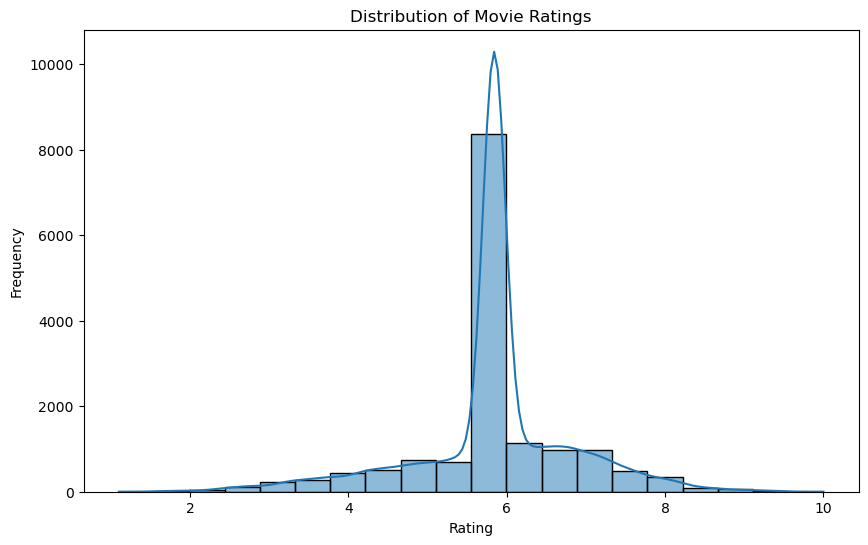

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Ratings by Genre


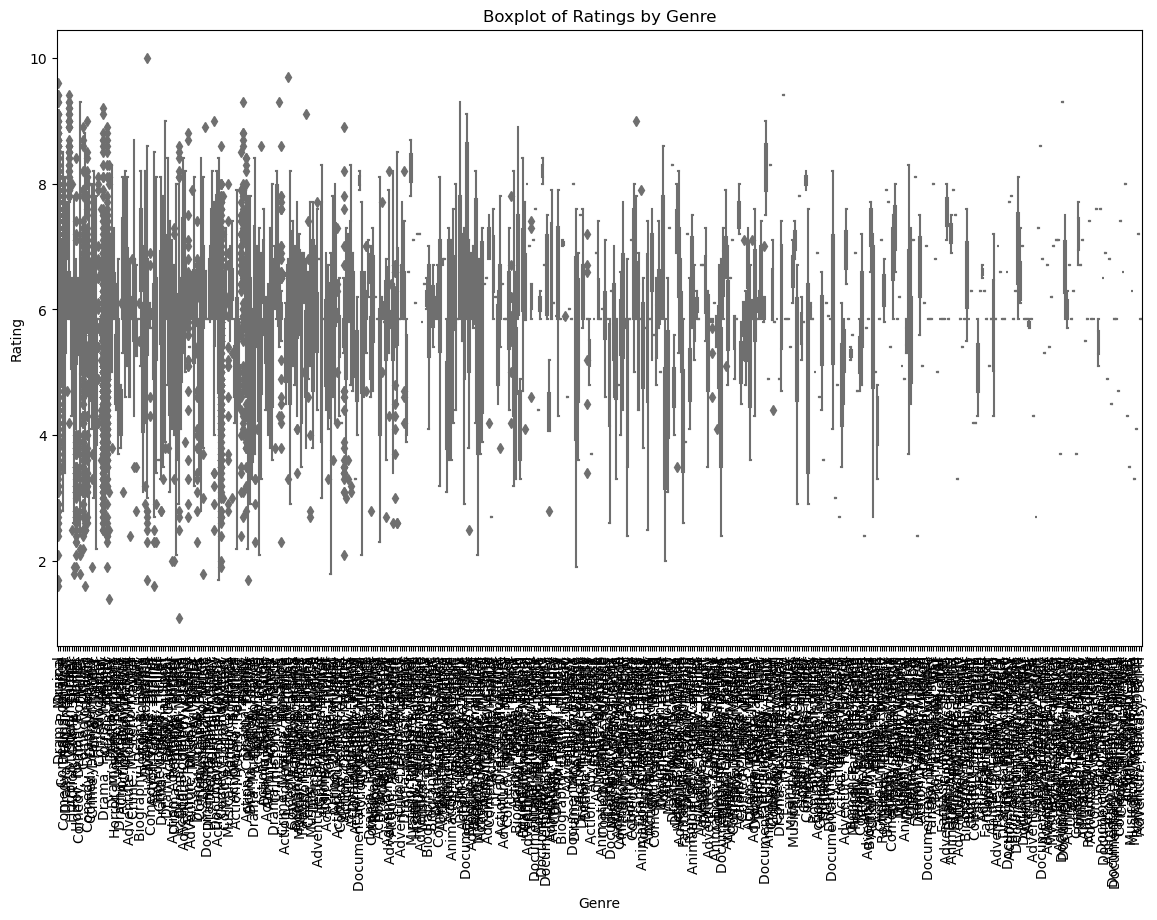

In [20]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Rating', data=df, palette='pastel') 
plt.title('Boxplot of Ratings by Genre')
plt.xticks(rotation=90)
plt.show()

# Scatter Plot of Votes vs. Rating


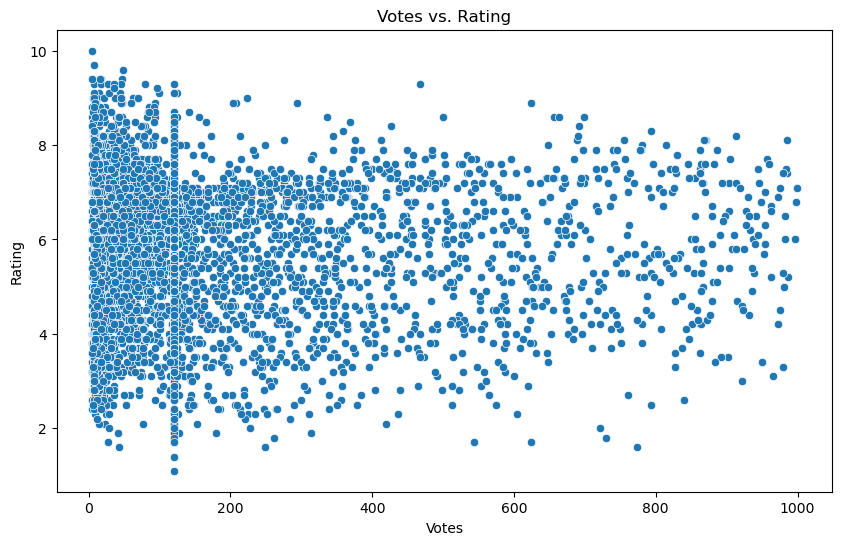

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


# Count Plot of Movies per Genre


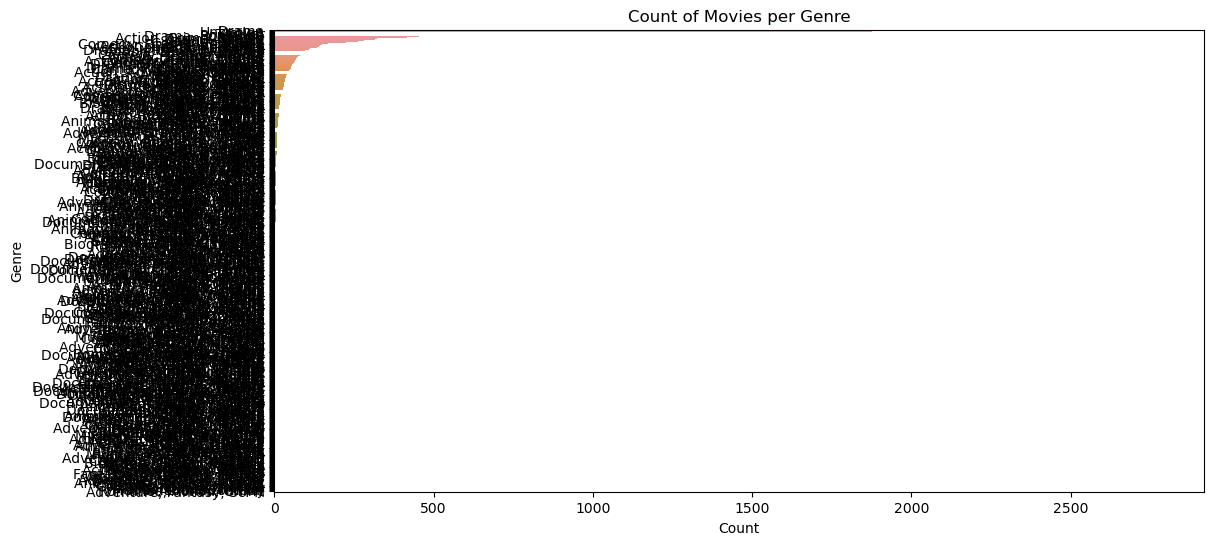

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index)
plt.title('Count of Movies per Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# Rating Distribution by Director


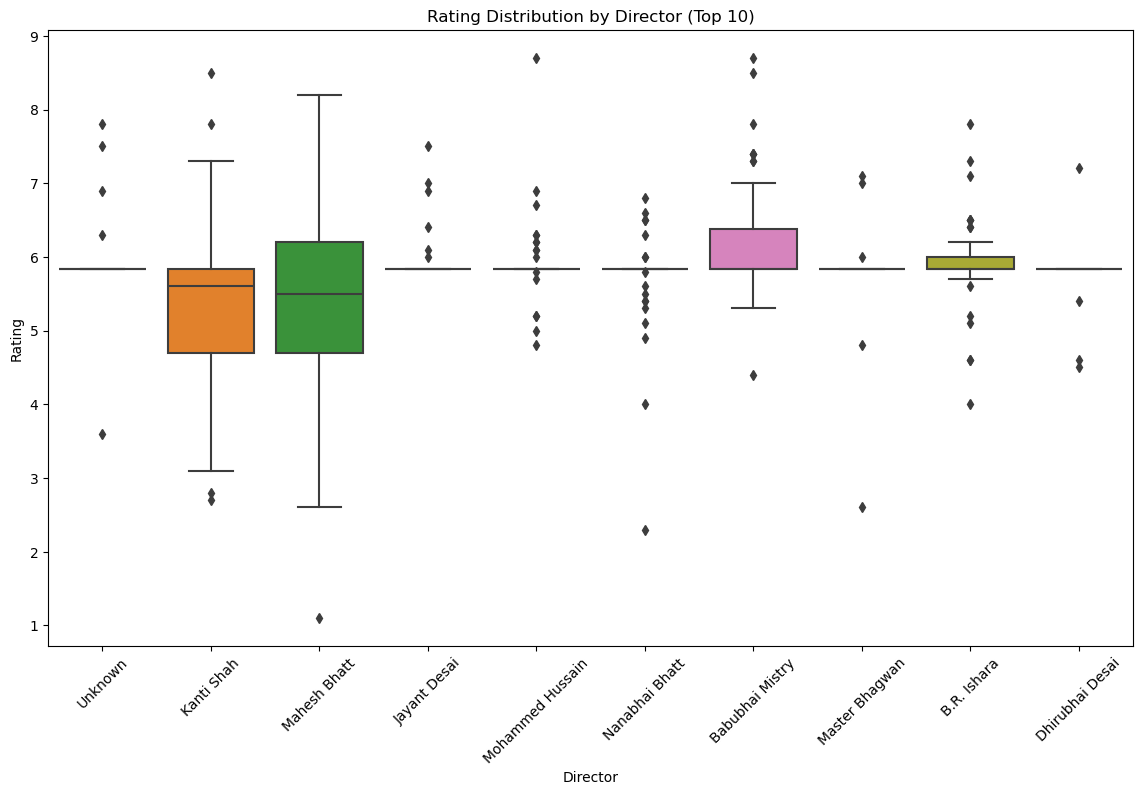

In [23]:
plt.figure(figsize=(14, 8))
top_directors = df['Director'].value_counts().index[:10]
sns.boxplot(x='Director', y='Rating', data=df[df['Director'].isin(top_directors)])
plt.title('Rating Distribution by Director (Top 10)')
plt.xticks(rotation=45)
plt.show()


# Heatmap of Correlations


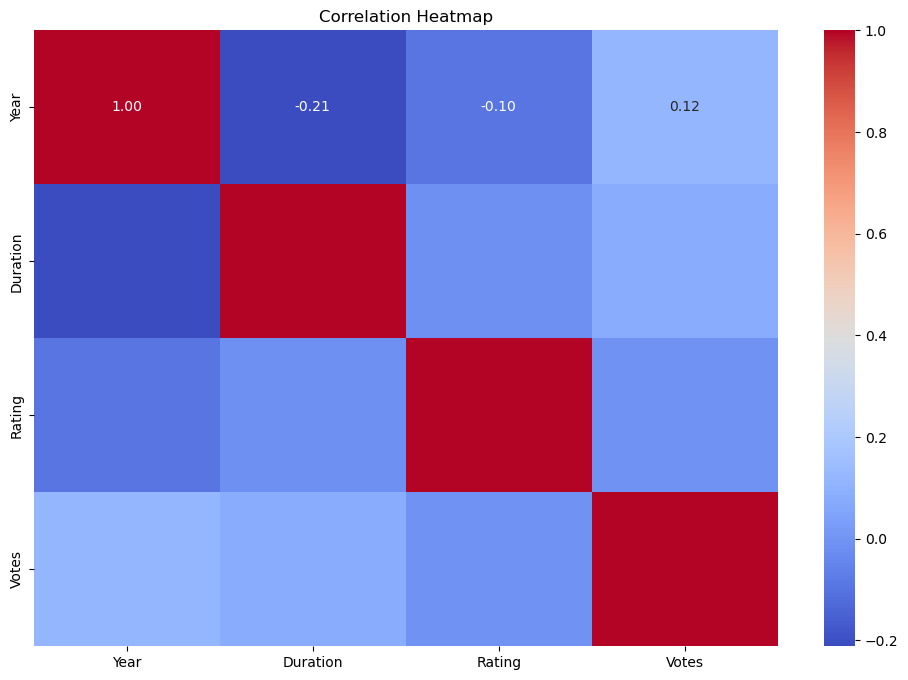

In [24]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the number of samples in the training and test datasets
print(f"Number of samples in training data: {X_train.shape[0]}")
print(f"Number of samples in test data: {X_test.shape[0]}")

Number of samples in training data: 12407
Number of samples in test data: 3102


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6593185820295197
R-squared: 0.31497757742901156


In [ ]:
from sklearn.svm import SVR

# Your code to scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Support Vector Regressor model
model = SVR()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
